## 班佛定律
**班佛定律**，也被稱為第一位數法則，是一個關於在許多真實世界數據集中，首位數字出現頻率的觀察。 簡單來說，它指出數字 1 出現為首位數字的機率約為 30%，而數字 9 出現為首位數字的機率則小於 5%。

更詳細的說明：

* 非均勻分佈： 與直覺相反，數字 1 到 9 並非以相同的機率作為數據集中的首位數字。
* 對數分佈： 班佛定律指出，首位數字 d 出現的機率，可以用以下公式計算： P(d) = log10(1 + 1/d)

### Python Package 所需套件

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### 資料來源
監察院-政治獻金公開查閱平台 https://ardata.cy.gov.tw/home   
透過 Shell/Batch 下載後，再合併為一個檔案

In [2]:
csv_file = 'DATA/2024總統大選政治獻金.csv'

In [3]:
# 讀取 CSV 檔案
df = pd.read_csv(csv_file)

In [4]:
# 顯示前 10 筆資料
df.head(10)

,性別,項目名稱,選舉名稱,申報序號／年度,交易日期,收支科目,收支,捐贈者／支出對象,身分證／統一編號,收入金額,...,存入專戶日期,返還/繳庫,應揭露之支出對象,支出對象之內部人員姓名,支出對象之內部人員職稱,政黨之內部人員姓名,政黨之內部人員職稱,關係,更正註記,資料更正日期
0,男,賴清德,113年總統、副總統選舉,首次,2023/7/1,個人捐贈收入,收入,陳賜正,P12*******,5000,...,2023/7/7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,男,賴清德,113年總統、副總統選舉,首次,2023/7/1,個人捐贈收入,收入,陳鋒隆,K10*******,3000,...,2023/7/7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,男,賴清德,113年總統、副總統選舉,首次,2023/7/1,個人捐贈收入,收入,陳鋒隆,K10*******,1180,...,2023/7/7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,男,賴清德,113年總統、副總統選舉,首次,2023/7/1,個人捐贈收入,收入,薛志弘,N12*******,1000,...,2023/7/7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,女,賴清德,113年總統、副總統選舉,首次,2023/7/1,個人捐贈收入,收入,鄭明玲,F22*******,1180,...,2023/7/7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,女,賴清德,113年總統、副總統選舉,首次,2023/7/1,個人捐贈收入,收入,洪秀惠,N20*******,20000,...,2023/7/7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,女,賴清德,113年總統、副總統選舉,首次,2023/7/1,個人捐贈收入,收入,王慧娟,J22*******,1180,...,2023/7/7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,男,賴清德,113年總統、副總統選舉,首次,2023/7/1,個人捐贈收入,收入,王家忠,U12*******,1180,...,2023/7/7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,女,賴清德,113年總統、副總統選舉,首次,2023/7/1,個人捐贈收入,收入,鄧君怡,U22*******,1180,...,2023/7/7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,女,賴清德,113年總統、副總統選舉,首次,2023/7/1,個人捐贈收入,收入,黃麗萍,F22*******,10000,...,2023/7/7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 以 '收支科目' 統計筆數
df['收支科目'].value_counts()

收支科目
個人捐贈收入       176956
匿名捐贈          37782
雜支支出          17902
交通旅運支出        15814
人事費用支出         4587
集會支出           3071
宣傳支出           1751
營利事業捐贈收入       1371
返還捐贈支出          238
租用競選辦事處支出       236
公共關係費用支出        227
租用宣傳車輛支出         93
繳庫支出             78
人民團體捐贈收入         36
政黨捐贈收入           10
其他收入              5
Name: count, dtype: int64

### 個人捐贈分析

In [6]:
# 篩選 
# [收支科目]=個人捐贈收入
# 
df_per = df[df['收支科目'] == '個人捐贈收入']

In [7]:
# 資料筆數
print("資料總筆數：", df.shape)
print("個人捐贈：", df_per.shape)

資料總筆數： (260157, 26)
個人捐贈： (176956, 26)


In [8]:
# 相關欄位
df_per2 = df_per[['性別', '項目名稱', '捐贈者／支出對象','身分證／統一編號','收入金額',
                 '地址','聯絡電話','捐贈方式']]
df_per2.head(10)

,性別,項目名稱,捐贈者／支出對象,身分證／統一編號,收入金額,地址,聯絡電話,捐贈方式
0,男,賴清德,陳賜正,P12*******,5000,臺北市信義區****,0910*****,匯款
1,男,賴清德,陳鋒隆,K10*******,3000,臺中市西屯區****,0937*****,匯款
2,男,賴清德,陳鋒隆,K10*******,1180,臺中市西屯區****,0937*****,匯款
3,男,賴清德,薛志弘,N12*******,1000,桃園市桃園區****,0939*****,匯款
4,女,賴清德,鄭明玲,F22*******,1180,新北市樹林區****,0932*****,匯款
5,女,賴清德,洪秀惠,N20*******,20000,新竹市東區新****,0963*****,匯款
6,女,賴清德,王慧娟,J22*******,1180,桃園市蘆竹區****,0973*****,匯款
7,男,賴清德,王家忠,U12*******,1180,花蓮縣壽豐鄉****,0933*****,匯款
8,女,賴清德,鄧君怡,U22*******,1180,花蓮縣花蓮市****,0933*****,匯款
9,女,賴清德,黃麗萍,F22*******,10000,臺北市北投區****,0936*****,匯款


In [9]:
# 筆數統計
df_per2['項目名稱'].value_counts()

項目名稱
柯文哲    146950
賴清德     26359
侯友宜      3629
張佑輔        13
蘇煥智         2
陳美妃         2
符音          1
Name: count, dtype: int64

In [10]:
# 僅保留特定候選人
per = ['賴清德','柯文哲','侯友宜']
df_per3=df_per2[df_per2['項目名稱'].isin(per)]

In [11]:
df_per3['項目名稱'].value_counts()

項目名稱
柯文哲    146950
賴清德     26359
侯友宜      3629
Name: count, dtype: int64

In [12]:
df_per3.head(10)

,性別,項目名稱,捐贈者／支出對象,身分證／統一編號,收入金額,地址,聯絡電話,捐贈方式
0,男,賴清德,陳賜正,P12*******,5000,臺北市信義區****,0910*****,匯款
1,男,賴清德,陳鋒隆,K10*******,3000,臺中市西屯區****,0937*****,匯款
2,男,賴清德,陳鋒隆,K10*******,1180,臺中市西屯區****,0937*****,匯款
3,男,賴清德,薛志弘,N12*******,1000,桃園市桃園區****,0939*****,匯款
4,女,賴清德,鄭明玲,F22*******,1180,新北市樹林區****,0932*****,匯款
5,女,賴清德,洪秀惠,N20*******,20000,新竹市東區新****,0963*****,匯款
6,女,賴清德,王慧娟,J22*******,1180,桃園市蘆竹區****,0973*****,匯款
7,男,賴清德,王家忠,U12*******,1180,花蓮縣壽豐鄉****,0933*****,匯款
8,女,賴清德,鄧君怡,U22*******,1180,花蓮縣花蓮市****,0933*****,匯款
9,女,賴清德,黃麗萍,F22*******,10000,臺北市北投區****,0936*****,匯款


In [13]:
# Benford's Law 預期的第一個數字分佈
def benford_distribution():
    return [np.log10(1 + 1 / d) for d in range(1, 10)]

In [14]:
# 統計第一個數字的計數
def calc_first_digit(result, whom, amt_val):
    d = int(str(amt_val)[0])
    result[whom][d] += 1    
    #print(per,amt_val)

In [15]:
# 以名稱，建立一個長度為10的整數陣列
benford_data = {}
for p in per:
    benford_data[p] = np.zeros(10,dtype=int)

In [16]:
# 逐筆累計
for idx,row in df_per3.iterrows():
    calc_first_digit(benford_data, row['項目名稱'],row['收入金額'])

In [17]:
print(benford_data)

{'賴清德': array([    0, 11978,  2956,  6097,   651,  2886,  1145,   185,   160,
         301]), '柯文哲': array([    0, 66045, 19576, 33706,  1631, 21355,  2885,   372,  1080,
         300]), '侯友宜': array([   0, 1683,  634,  406,   51,  716,   67,   24,   29,   19])}


In [18]:
# 計算分佈
benford_result = {}
for p in per:
    benford_result[p] = np.zeros(10,dtype=float)
    sub_total = np.sum(benford_data[p][1:10])
    for i in range(1,10):
        benford_result[p][i] = benford_data[p][i]/sub_total

print(benford_result)

{'賴清德': array([0.        , 0.45441785, 0.11214386, 0.2313062 , 0.02469745,
       0.10948822, 0.04343867, 0.00701848, 0.00607003, 0.01141925]), '柯文哲': array([0.        , 0.44943858, 0.13321538, 0.22937053, 0.01109901,
       0.14532154, 0.01963253, 0.00253147, 0.00734944, 0.00204151]), '侯友宜': array([0.        , 0.46376412, 0.17470378, 0.11187655, 0.01405346,
       0.19729953, 0.01846239, 0.00661339, 0.00799118, 0.0052356 ])}


In [19]:
# 班佛定律理論值
expected = benford_distribution()

In [20]:
# 設定中文字型
# 依不同平台 (Windows/Mac) 需設定不同中文字型
# 或將範例的中文字改為英文
matplotlib.rc('font', family='BiauKai')

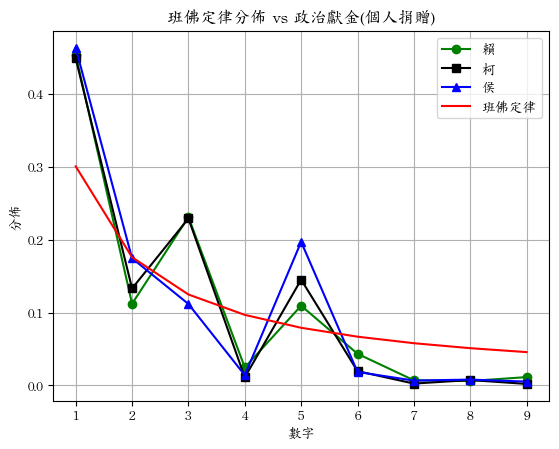

In [21]:
# 繪圖
digits = range(1, 10)

plt.plot(digits, benford_result['賴清德'][1:10], label='賴',color='green', marker='o', linestyle='-')
plt.plot(digits, benford_result['柯文哲'][1:10], label='柯',color='black', marker='s', linestyle='-')
plt.plot(digits, benford_result['侯友宜'][1:10], label='侯',color='blue', marker='^', linestyle='-')

plt.plot(digits, expected, label="班佛定律", color='red',linestyle='-')

plt.xlabel('數字')
plt.ylabel('分佈')
plt.title("班佛定律分佈 vs 政治獻金(個人捐贈)")
plt.legend()
plt.grid(True)
plt.show()

### 支出分析

In [22]:
# 篩選 
# [收支]=支出
# 
df_in = df[df['收支'] == '支出']

In [23]:
# 相關欄位
df_in2 = df_in[[ '項目名稱', '收支科目','身分證／統一編號','支出金額','支出用途',
                 '地址','聯絡電話','應揭露之支出對象','支出對象之內部人員姓名']]
df_in2.head(10)

,項目名稱,收支科目,身分證／統一編號,支出金額,支出用途,地址,聯絡電話,應揭露之支出對象,支出對象之內部人員姓名
69,賴清德,雜支支出,03741302,140,匯費,臺北市大安區****,NaN,否,NaN
70,賴清德,交通旅運支出,16446274,40,車票,臺北市南港區****,NaN,否,NaN
71,賴清德,交通旅運支出,07524729,101,車資,臺北市中正區****,NaN,否,NaN
72,賴清德,交通旅運支出,NaN,255,車資,NaN,02-2*****,否,NaN
73,賴清德,交通旅運支出,NaN,490,車資,NaN,02-2*****,否,NaN
74,賴清德,交通旅運支出,NaN,800,車資,NaN,08-7*****,否,NaN
75,賴清德,交通旅運支出,16446274,1445,車票,臺北市南港區****,NaN,否,NaN
76,賴清德,交通旅運支出,16446274,1490,車票,臺北市南港區****,NaN,否,NaN
77,賴清德,集會支出,27722466,12600,會場佈置,新北市新店區****,NaN,否,NaN
78,賴清德,交通旅運支出,91228357,1000,油資,NaN,NaN,否,NaN


In [24]:
df_in2['應揭露之支出對象'].value_counts()

應揭露之支出對象
否    43997
Name: count, dtype: int64

In [25]:
# 以名稱，建立一個長度為10的整數陣列
benford_data = {}
for p in per:
    benford_data[p] = np.zeros(10,dtype=int)

In [26]:
# 僅保留特定候選人
df_in3=df_in2[df_in2['項目名稱'].isin(per)]

In [27]:
df_in3['項目名稱'].value_counts()

項目名稱
賴清德    18012
侯友宜    17676
柯文哲     8180
Name: count, dtype: int64

In [28]:
# 逐筆累計
for idx,row in df_in3.iterrows():
    calc_first_digit(benford_data, row['項目名稱'],row['支出金額'])

In [29]:
print(benford_data)

{'賴清德': array([   0, 6970, 2731, 1992, 1654, 1084,  949, 1089,  801,  742]), '柯文哲': array([   0, 2424, 1804, 1085,  762,  581,  474,  473,  316,  261]), '侯友宜': array([   0, 5839, 3188, 1850, 1670, 1148, 1425,  898,  790,  868])}


In [30]:
# 計算分佈
benford_result = {}
for p in per:
    benford_result[p] = np.zeros(10,dtype=float)
    sub_total = np.sum(benford_data[p][1:10])
    for i in range(1,10):
        benford_result[p][i] = benford_data[p][i]/sub_total

print(benford_result)

{'賴清德': array([0.        , 0.38696425, 0.15162114, 0.11059294, 0.09182767,
       0.0601821 , 0.0526871 , 0.06045969, 0.04447035, 0.04119476]), '柯文哲': array([0.        , 0.29633252, 0.2205379 , 0.13264059, 0.09315403,
       0.07102689, 0.05794621, 0.05782396, 0.03863081, 0.03190709]), '侯友宜': array([0.        , 0.33033492, 0.18035755, 0.10466169, 0.09447839,
       0.06494682, 0.08061779, 0.05080335, 0.04469337, 0.04910613])}


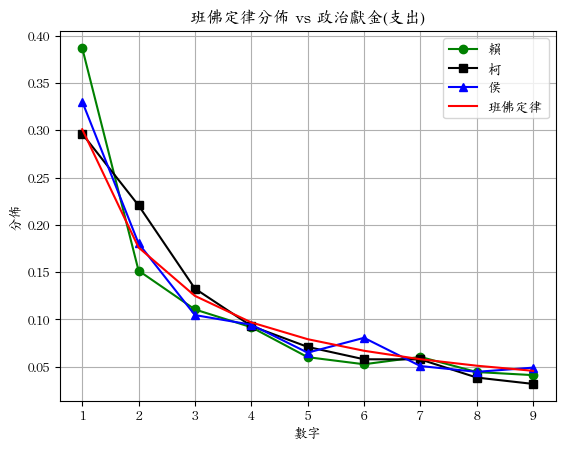

In [31]:
# 繪圖
digits = range(1, 10)

plt.plot(digits, benford_result['賴清德'][1:10], label='賴',color='green', marker='o', linestyle='-')
plt.plot(digits, benford_result['柯文哲'][1:10], label='柯',color='black', marker='s', linestyle='-')
plt.plot(digits, benford_result['侯友宜'][1:10], label='侯',color='blue', marker='^', linestyle='-')

plt.plot(digits, expected, label="班佛定律", color='red',linestyle='-')

plt.xlabel('數字')
plt.ylabel('分佈')
plt.title("班佛定律分佈 vs 政治獻金(支出)")
plt.legend()
plt.grid(True)
plt.show()